In [1]:
import pandas as pd
import os
from glob import glob

In [82]:
pd.set_option('future.no_silent_downcasting', True)
colunas_a_manter = ['Unidade da Federação', 'Menor de 10 anos', '10 a 14 anos', '15 a 19 anos', 'Total']
dados_a_manter = [3, 8, 19, 23, 24, 29]
dfs = []
current_dir = os.getcwd()
idh_dir = os.path.join(current_dir, 'IDHs')
csv_files = glob(os.path.join(idh_dir, '*.csv')) 
for file in csv_files:
    head = pd.read_csv(file, skiprows=3, nrows=1, encoding='cp1252', sep=';')
    head = head.columns.to_list()
    colunas_desejadas = [col for col in colunas_a_manter if col in head]
    df = pd.read_csv(file, skiprows = lambda x: x not in dados_a_manter, encoding='cp1252', sep=';', usecols=colunas_desejadas)
    if "Menor de 10 anos" not in df.columns:
        df.insert(1, "Menor de 10 anos", 0)
    df.replace("-", 0, inplace=True)
    df['Unidade da Federação'] = df['Unidade da Federação'].apply(lambda x: x[3:])
    df.set_index('Unidade da Federação', inplace=True)
    colunas_numericas = ['Menor de 10 anos', '10 a 14 anos', '15 a 19 anos', 'Total']
    df[colunas_a_manter[1:]] = df[colunas_a_manter[1:]].apply(pd.to_numeric, errors='coerce')
    dfs.append(df)
dfs[1]


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,0,1670,27588,132938
Bahia,0,1568,28777,188960
São Paulo,0,1772,52478,552310
Paraná,0,629,15958,146291
Goiás,0,474,11730,92768


<Axes: title={'center': 'Distribuição Percentual por Faixa Etária'}>

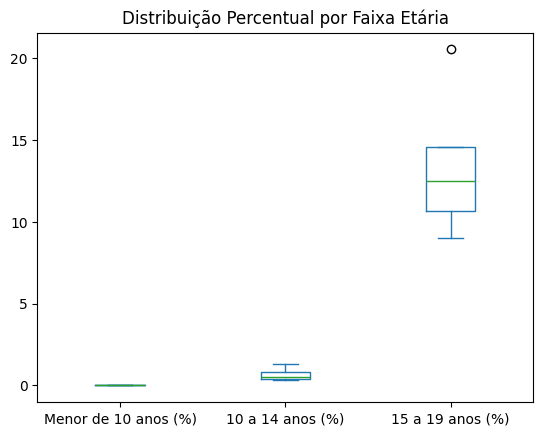

In [94]:
df = dfs[0]

# Calcular porcentagens
df['Menor de 10 anos (%)'] = (df['Menor de 10 anos'] / df['Total']) * 100
df['10 a 14 anos (%)'] = (df['10 a 14 anos'] / df['Total']) * 100
df['15 a 19 anos (%)'] = (df['15 a 19 anos'] / df['Total']) * 100

df_percent = df[['Menor de 10 anos (%)', '10 a 14 anos (%)', '15 a 19 anos (%)']]

ax = df_percent.plot(kind='box', title='Distribuição Percentual por Faixa Etária')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')
    
ax